<a href="https://colab.research.google.com/github/DavidEmeryUofC/CDS_Project_Restaurant_Rev_Prediction/blob/main/CDSproject2_restaurant_revenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

<center> <h1> <span style='color:#292D78'> CREWES Data Science Training </span> </h1> </center>

<center> <h2> <span style='color:#DF7F00'> Project: Restaurant Revenue Prediction </span> </h2> </center>

---

This [Jupyter Notebook](https://jupyter.org/install) is for analysing the data in the [Kaggle Project](https://www.kaggle.com/code/akouaorsot/restaurant-revenue-s-predictions) for estimation of Restaurant Revenue.  

Project members are: [David Emery](https://www.linkedin.com/in/david-emery-54659a3a/), [Nazhat Shirin Rashid](https://www.linkedin.com/in/nazhatrashid/), [Stephanie Misailidis](https://www.linkedin.com/in/stephanie-jimenez-misailidis-54a6b3b1/?originalSubdomain=ca), and [Reginaldo Moriera](https://www.linkedin.com/in/reginaldo-moreira-70a016b3/)

In [1]:
# Core utilities
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (10,7)}) # default figure size set for Powerpoint

# print plots
%matplotlib inline 

# To supress warnings and deprecated messages
import warnings
warnings.filterwarnings("ignore")


## Import data 

In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
filepath = '/content/drive/MyDrive/CDS_Course/project'
filename = filepath + '/test.csv'
print(filename)
df_test = pd.read_csv(filename)
df_test.head()

/content/drive/MyDrive/CDS_Course/project/test.csv


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [4]:
filename = filepath + '/train.csv'
print(filename)
df_train = pd.read_csv(filename)
df_train.head()

/content/drive/MyDrive/CDS_Course/project/train.csv


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [5]:
df_train["ODate"] = pd.to_datetime(df_train["Open Date"], format = "%m/%d/%Y", utc = True)
df_test["ODate"] = pd.to_datetime(df_test["Open Date"], format = "%m/%d/%Y", utc = True)

lastopen = pd.to_datetime(df_train["Open Date"].max(), format='%m/%d/%Y', utc = True)

df_train["DOpen"] = (lastopen - df_train["ODate"])/ pd.offsets.Day(1)
df_test["DOpen"] = (lastopen - df_test["ODate"])/ pd.offsets.Day(1)

### Data fields
Id : Restaurant id.   
Open Date : opening date for a restaurant  
City : City that the restaurant is in. Note that there are unicode in the names.   
City Group: Type of the city. Big cities, or Other.   
Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile  
P1, P2 - P37: There are three categories of these obfuscated data.   
- Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales.  
- Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability.  
- Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.  

Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

In [6]:
#df_test.info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Id          137 non-null    int64              
 1   Open Date   137 non-null    object             
 2   City        137 non-null    object             
 3   City Group  137 non-null    object             
 4   Type        137 non-null    object             
 5   P1          137 non-null    int64              
 6   P2          137 non-null    float64            
 7   P3          137 non-null    float64            
 8   P4          137 non-null    float64            
 9   P5          137 non-null    int64              
 10  P6          137 non-null    int64              
 11  P7          137 non-null    int64              
 12  P8          137 non-null    int64              
 13  P9          137 non-null    int64              
 14  P10         137 non-null    int64         

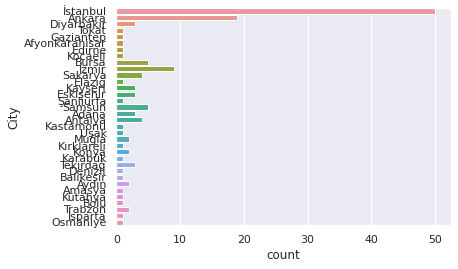

In [7]:
#sns.countplot(data = df_test, y = "City")
sns.countplot(data = df_train, y = "City")

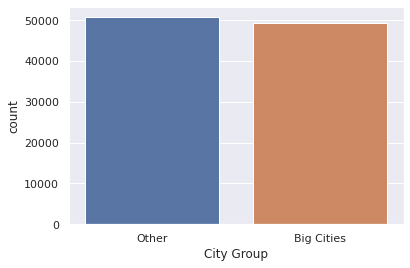

In [8]:
sns.countplot(data = df_test, x = "City Group")
#sns.countplot(data = df_train, x = "City Group")

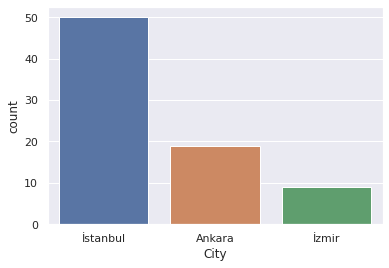

In [9]:
#sns.countplot(data = df_test[df_test["City Group"] == 'Big Cities'], x = "City")
sns.countplot(data = df_train[df_train["City Group"] == 'Big Cities'], x = "City")

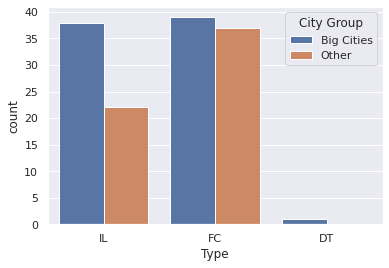

In [10]:
#sns.countplot(data = df_test, x = "Type",  hue="City Group")
sns.countplot(data = df_train, x = "Type",  hue="City Group")

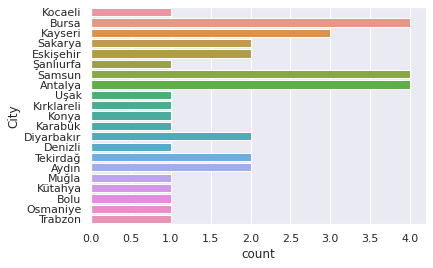

In [11]:
#sns.countplot(data = df_test[(df_test["City Group"] == 'Other') & (df_test["Type"] == "FC")], y = "City")
sns.countplot(data = df_train[(df_train["City Group"] == 'Other') & (df_train["Type"] == "FC")], y = "City")

In [12]:
#df_test.isna().sum()
df_train.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
ODate         0
DOpen         0
dtype: int64

In [13]:
# Extracting names of numerical and categorical features
cols_num = list(df_train.drop(columns = ["revenue"]).select_dtypes(include = ["int64", "float64"]))
cols_cat = list(df_train.drop(columns = ["revenue"]).select_dtypes(include = ["object", "category", "bool"]))

print("Numerical columns:", cols_num)
print("Categorical columns:", cols_cat)

Numerical columns: ['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'DOpen']
Categorical columns: ['Open Date', 'City', 'City Group', 'Type']


### Data distribution

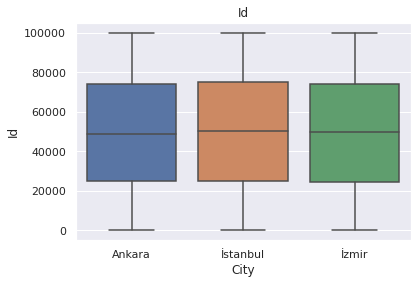

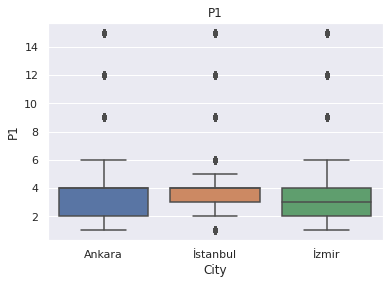

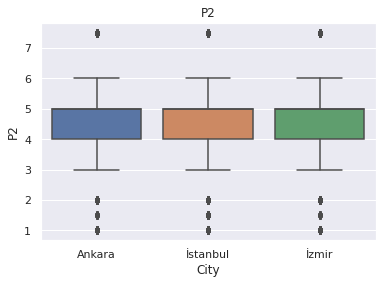

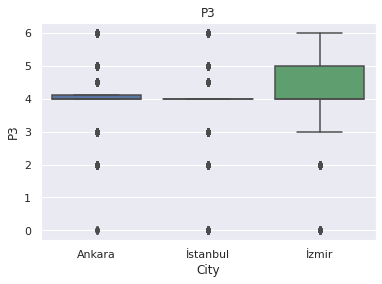

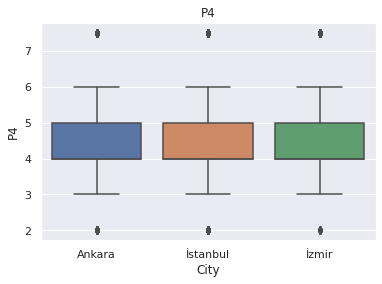

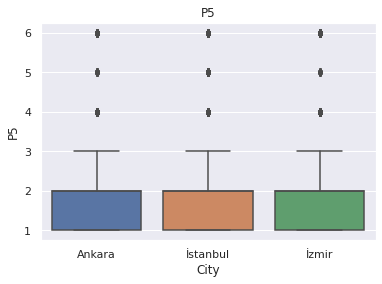

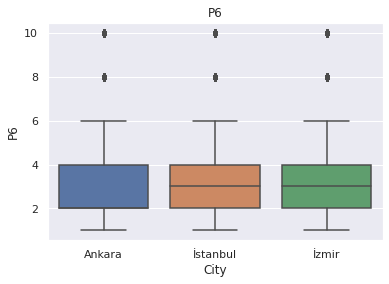

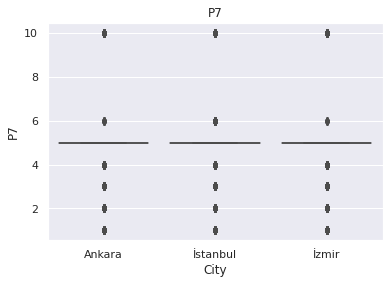

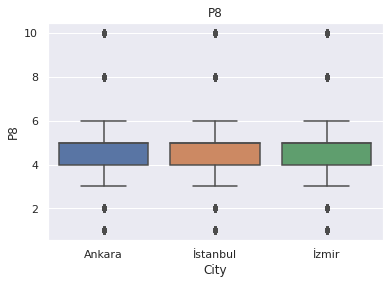

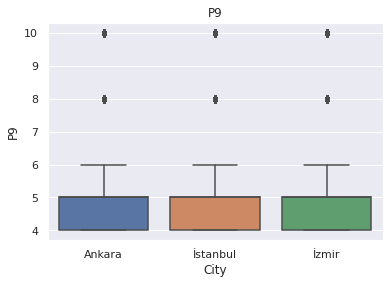

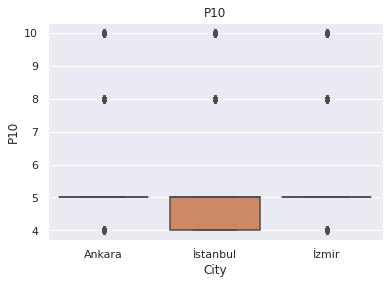

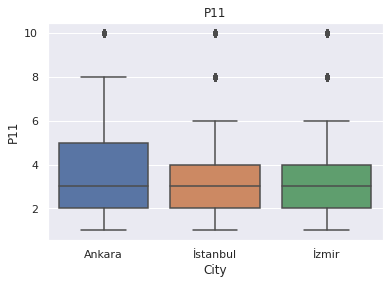

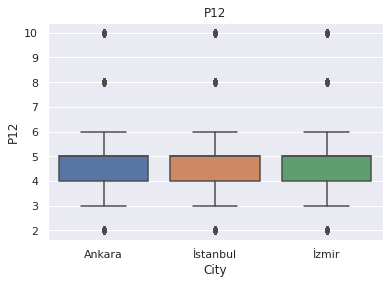

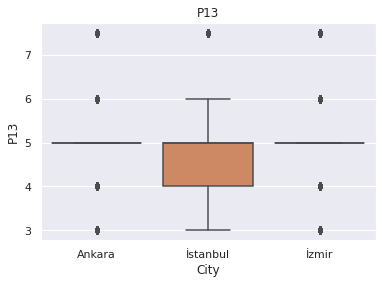

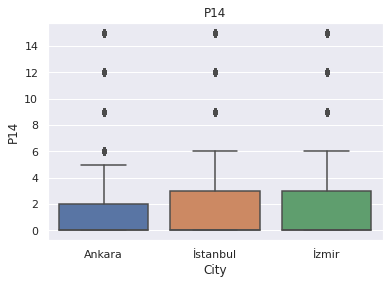

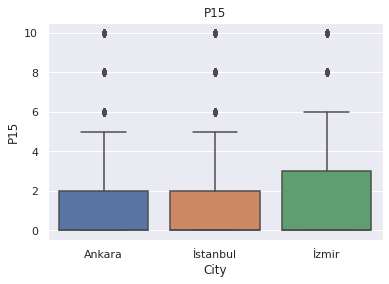

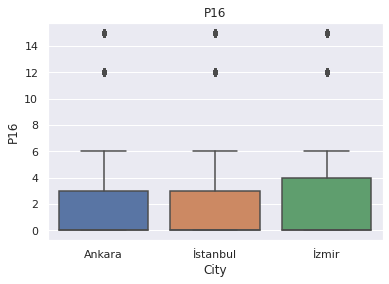

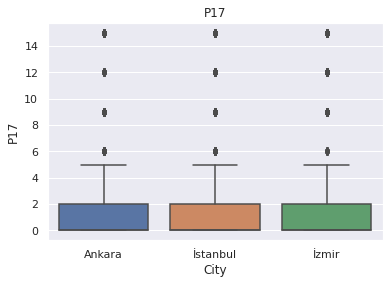

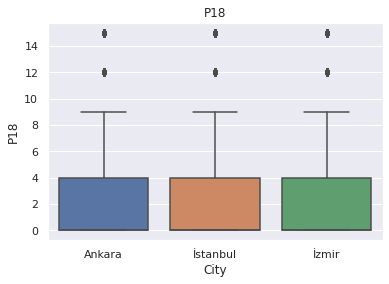

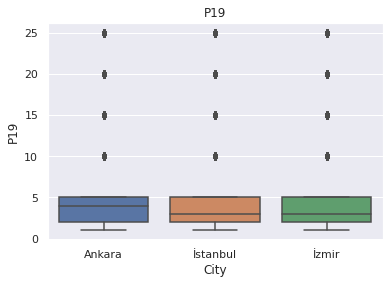

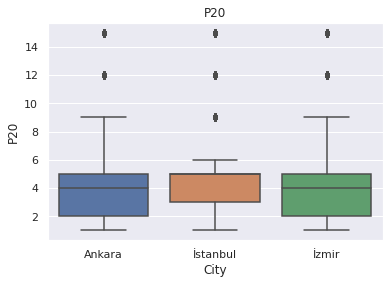

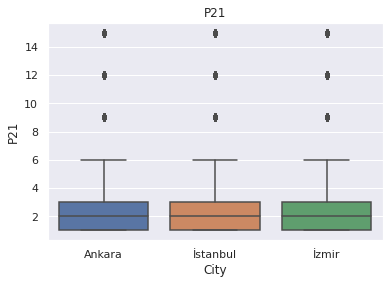

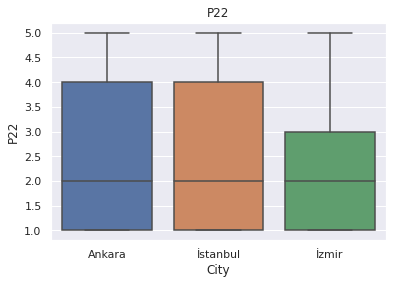

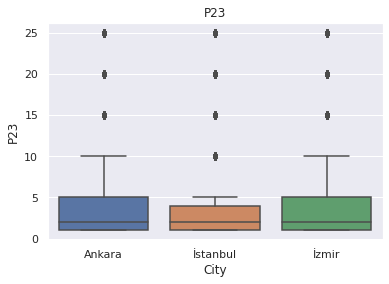

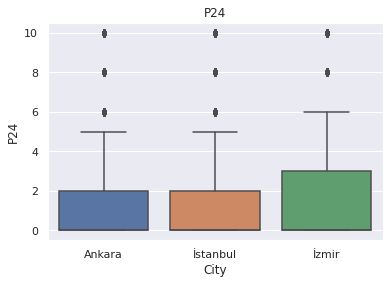

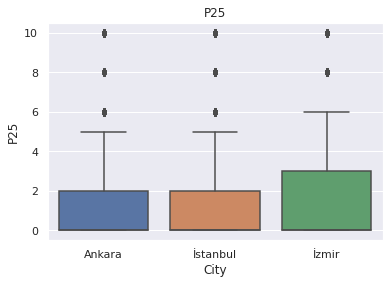

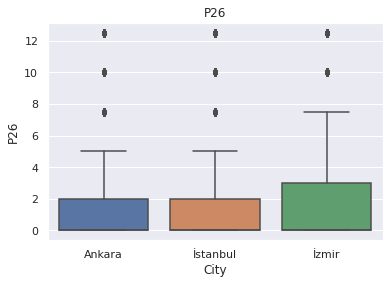

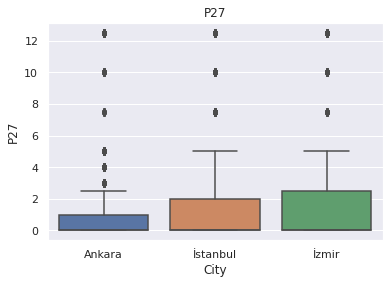

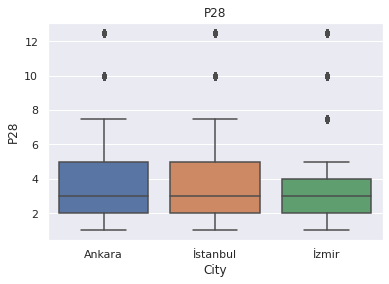

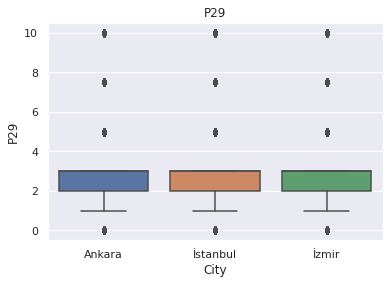

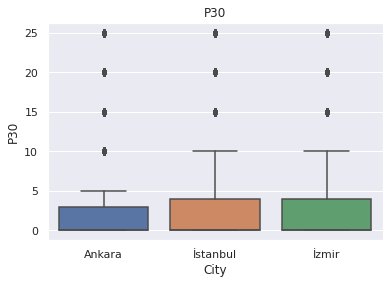

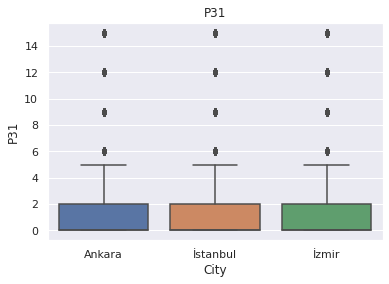

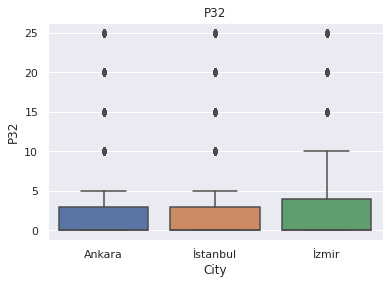

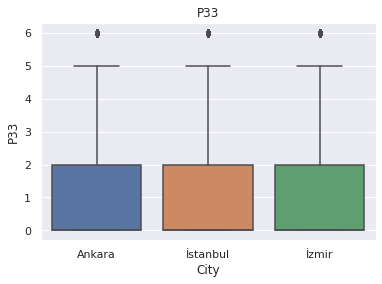

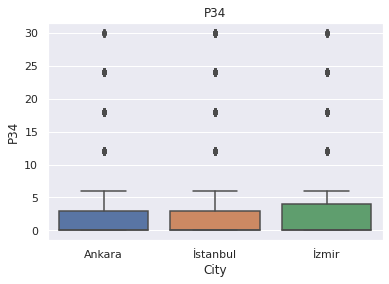

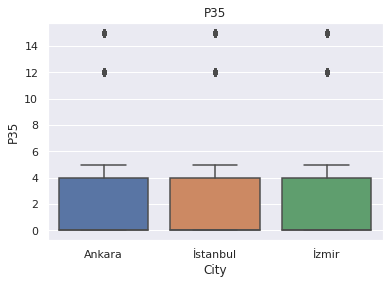

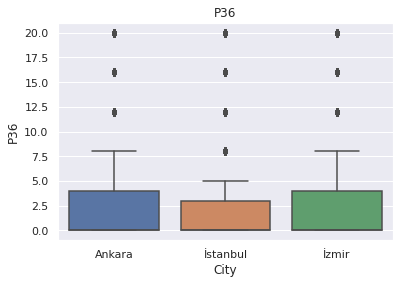

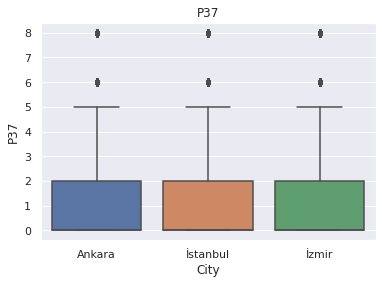

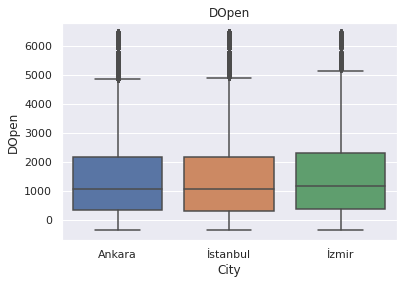

In [21]:
for i in cols_num:
    sns.boxplot(data = df_test[df_test["City Group"] == 'Big Cities'], x = "City", y = i, showfliers = True)
    plt.title(i)
    plt.show()

In [15]:
df_test.describe().transpose()
#df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,100000.0,49999.500000,28867.657797,0.0,24999.75,49999.5,74999.25,99999.0
P1,100000.0,4.088030,2.812963,1.0,2.00,3.0,4.00,15.0
P2,100000.0,4.428085,1.428865,1.0,3.75,5.0,5.00,7.5
P3,100000.0,4.215325,0.842161,0.0,4.00,4.0,4.00,6.0
P4,100000.0,4.396025,1.035827,2.0,4.00,4.0,5.00,7.5
P5,100000.0,1.989590,1.065314,1.0,1.00,2.0,2.00,6.0
P6,100000.0,2.881900,1.531429,1.0,2.00,2.0,4.00,10.0
P7,100000.0,5.300510,2.178580,1.0,5.00,5.0,5.00,10.0
P8,100000.0,4.931000,1.718490,1.0,4.00,5.0,5.00,10.0
P9,100000.0,5.251380,1.702632,4.0,4.00,5.0,5.00,10.0


### Basic correlation analysis:

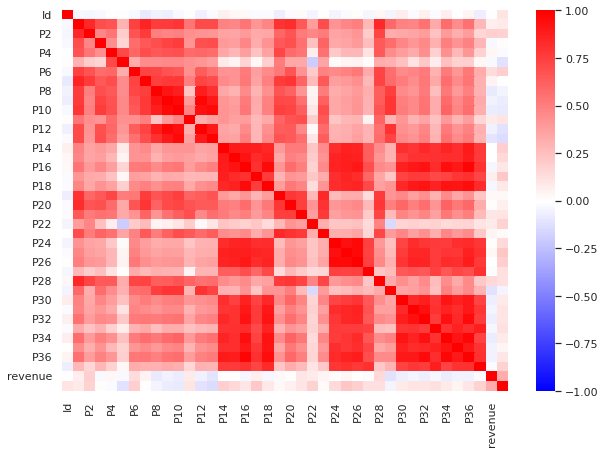

In [16]:
plt.figure(figsize = (10,7))
sns.heatmap(data = df_train.corr(), vmin = -1, vmax = 1, annot = False, cmap ='bwr');
#sns.heatmap(data = df_test.corr(), vmin = -1, vmax = 1, annot = False, cmap ='bwr');

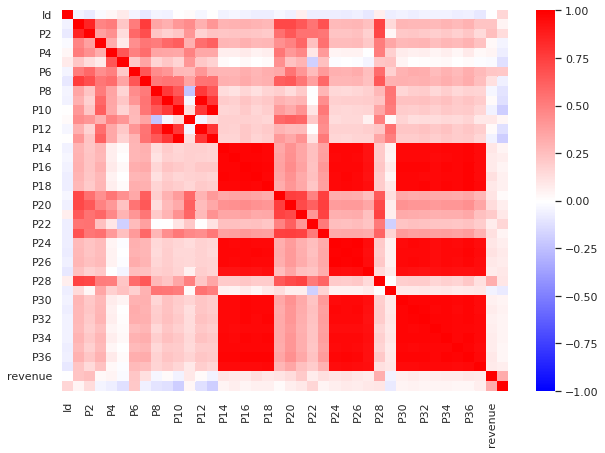

In [17]:
plt.figure(figsize = (10,7))
sns.heatmap(data = df_train.corr(method = "spearman"), vmin = -1, vmax = 1, annot = False, cmap ='bwr');
#sns.heatmap(data = df_test.corr(method = "spearman"), vmin = -1, vmax = 1, annot = False, cmap ='bwr');

### Histrogram plots

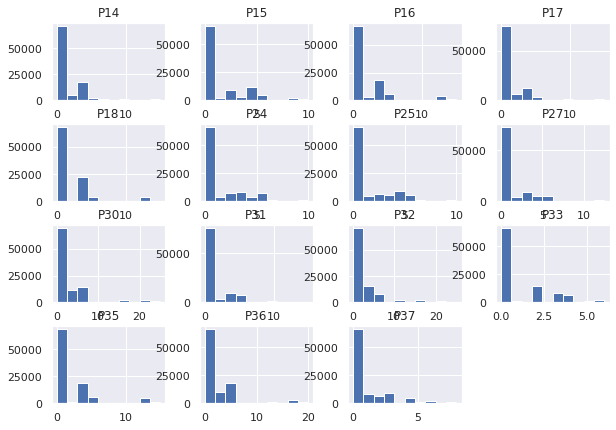

In [18]:
df_test.hist(['P14','P15','P16','P17','P18','P24','P25','P27','P30','P31','P32','P33','P35','P36','P37'], figsize = (10,7));

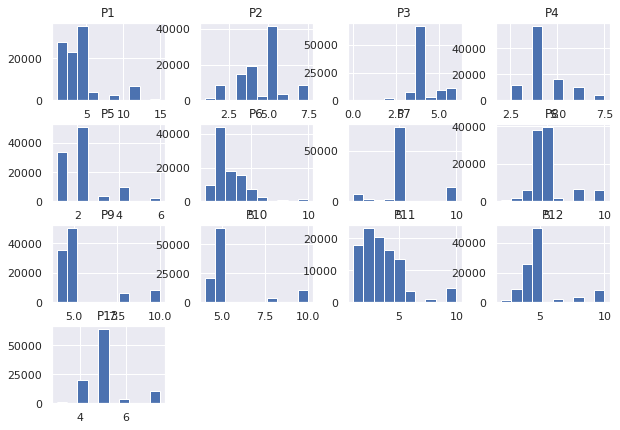

In [19]:
df_test.hist(['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13'], figsize = (10,7));

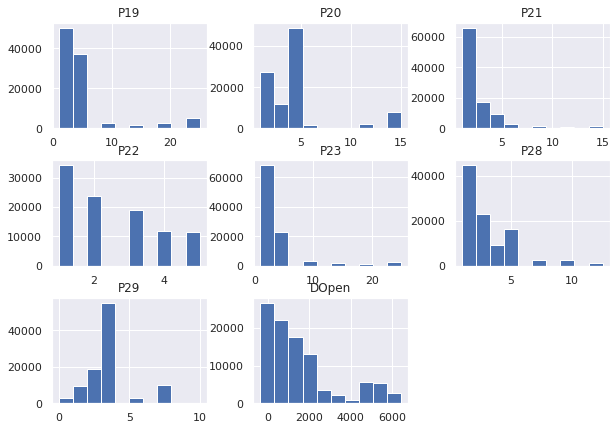

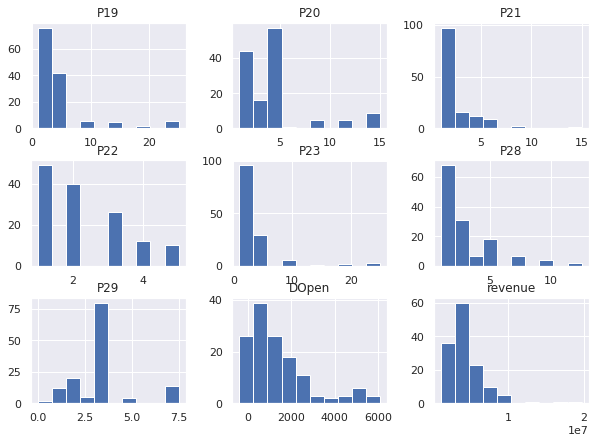

In [20]:
df_test.hist(['P19','P20','P21','P22','P23','P28','P29','DOpen'], figsize = (10,7));
df_train.hist(['P19','P20','P21','P22','P23','P28','P29','DOpen','revenue'], figsize = (10,7));